### This Jupyter notebook will align alphafold and colabfold structures with the PDB Crystal Structures

In [2]:
import mdtraj as mdt
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as mplt
import pandas as pnd
import json

In [3]:
#First, we will load the crystal structure and the predicted structures

crystal = mdt.load('/home/hv454/comp-lab-class-2023/Week7/Inputs/2W9T.pdb')

rank_0_AF = mdt.load('/home/hv454/comp-lab-class-2023/Week7/rcsb_pdb_2W9T/ranked_0.pdb')
rank_1_AF = mdt.load('/home/hv454/comp-lab-class-2023/Week7/rcsb_pdb_2W9T/ranked_1.pdb')
rank_2_AF = mdt.load('/home/hv454/comp-lab-class-2023/Week7/rcsb_pdb_2W9T/ranked_2.pdb')
rank_3_AF = mdt.load('/home/hv454/comp-lab-class-2023/Week7/rcsb_pdb_2W9T/ranked_3.pdb')
rank_4_AF = mdt.load('/home/hv454/comp-lab-class-2023/Week7/rcsb_pdb_2W9T/ranked_4.pdb')

rank_1_C = mdt.load('/home/hv454/comp-lab-class-2023/Week7/Colab_2W9T/test_596c5_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb')
rank_2_C = mdt.load('/home/hv454/comp-lab-class-2023/Week7/Colab_2W9T/test_596c5_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb')
rank_3_C = mdt.load('/home/hv454/comp-lab-class-2023/Week7/Colab_2W9T/test_596c5_unrelaxed_rank_003_alphafold2_ptm_model_3_seed_000.pdb')
rank_4_C = mdt.load('/home/hv454/comp-lab-class-2023/Week7/Colab_2W9T/test_596c5_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb')
rank_5_C = mdt.load('/home/hv454/comp-lab-class-2023/Week7/Colab_2W9T/test_596c5_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb')


In [4]:
select_1 = 'name CA'
select_2 = 'backbone'
select_3 = 'sidechain and not (index == 1000)'

In [7]:
#Next, we will superpose the structures

pdb_crystal = rank_0_AF.superpose(crystal, 0, atom_indices=crystal.top.select(select_1))

pdb_AF_0 = rank_0_AF.superpose(pdb_crystal, 0, atom_indices=pdb_crystal.top.select(select_1))   
pdb_AF_1 = rank_1_AF.superpose(pdb_crystal, 0, atom_indices=pdb_crystal.top.select(select_1))
pdb_AF_2 = rank_2_AF.superpose(pdb_crystal, 0, atom_indices=pdb_crystal.top.select(select_1))
pdb_AF_3 = rank_3_AF.superpose(pdb_crystal, 0, atom_indices=pdb_crystal.top.select(select_1))
pdb_AF_4 = rank_4_AF.superpose(pdb_crystal, 0, atom_indices=pdb_crystal.top.select(select_1))

In [9]:
#calculate RMSD on CA atoms
rmsd_AF_0_CA = mdt.rmsd(pdb_crystal, pdb_AF_0, 0, atom_indices=pdb_crystal.top.select(select_1))
rmsd_AF_1_CA = mdt.rmsd(pdb_crystal, pdb_AF_1, 0, atom_indices=pdb_crystal.top.select(select_1))
rmsd_AF_2_CA = mdt.rmsd(pdb_crystal, pdb_AF_2, 0, atom_indices=pdb_crystal.top.select(select_1))
rmsd_AF_3_CA = mdt.rmsd(pdb_crystal, pdb_AF_3, 0, atom_indices=pdb_crystal.top.select(select_1))
rmsd_AF_4_CA = mdt.rmsd(pdb_crystal, pdb_AF_4, 0, atom_indices=pdb_crystal.top.select(select_1))


#calculate RMSD on backbone
rmsd_AF_0_BB = mdt.rmsd(pdb_crystal, pdb_AF_0, 0, atom_indices=pdb_crystal.top.select(select_2))
rmsd_AF_1_BB = mdt.rmsd(pdb_crystal, pdb_AF_1, 0, atom_indices=pdb_crystal.top.select(select_2))
rmsd_AF_2_BB = mdt.rmsd(pdb_crystal, pdb_AF_2, 0, atom_indices=pdb_crystal.top.select(select_2))
rmsd_AF_3_BB = mdt.rmsd(pdb_crystal, pdb_AF_3, 0, atom_indices=pdb_crystal.top.select(select_2))
rmsd_AF_4_BB = mdt.rmsd(pdb_crystal, pdb_AF_4, 0, atom_indices=pdb_crystal.top.select(select_2))

#calculate RMSD on sidechain
rmsd_AF_0_SC = mdt.rmsd(pdb_crystal, pdb_AF_0, 0, atom_indices=pdb_crystal.top.select(select_3))
rmsd_AF_1_SC = mdt.rmsd(pdb_crystal, pdb_AF_1, 0, atom_indices=pdb_crystal.top.select(select_3))
rmsd_AF_2_SC = mdt.rmsd(pdb_crystal, pdb_AF_2, 0, atom_indices=pdb_crystal.top.select(select_3))
rmsd_AF_3_SC = mdt.rmsd(pdb_crystal, pdb_AF_3, 0, atom_indices=pdb_crystal.top.select(select_3))
rmsd_AF_4_SC = mdt.rmsd(pdb_crystal, pdb_AF_4, 0, atom_indices=pdb_crystal.top.select(select_3))

In [10]:
#print RMSD on CA
print('RMSD on CA')
print('AlphaFold: ', rmsd_AF_0_CA)
print('AlphaFold: ', rmsd_AF_1_CA)
print('AlphaFold: ', rmsd_AF_2_CA)
print('AlphaFold: ', rmsd_AF_3_CA)
print('AlphaFold: ', rmsd_AF_4_CA)

RMSD on CA
AlphaFold:  [0.]
AlphaFold:  [0.01404038]
AlphaFold:  [0.03395914]
AlphaFold:  [0.04430555]
AlphaFold:  [0.03784496]


In [11]:
#print RMSD on backbone
print('RMSD on backbone')
print('AlphaFold: ', rmsd_AF_0_BB)
print('AlphaFold: ', rmsd_AF_1_BB)
print('AlphaFold: ', rmsd_AF_2_BB)
print('AlphaFold: ', rmsd_AF_3_BB)
print('AlphaFold: ', rmsd_AF_4_BB)

RMSD on backbone
AlphaFold:  [0.]
AlphaFold:  [0.01417474]
AlphaFold:  [0.0335379]
AlphaFold:  [0.04493427]
AlphaFold:  [0.03666973]


In [12]:
#print RMSD on sidechain
print('RMSD on sidechain')
print('AlphaFold: ', rmsd_AF_0_SC)
print('AlphaFold: ', rmsd_AF_1_SC)
print('AlphaFold: ', rmsd_AF_2_SC)
print('AlphaFold: ', rmsd_AF_3_SC)
print('AlphaFold: ', rmsd_AF_4_SC)

RMSD on sidechain
AlphaFold:  [0.00054498]
AlphaFold:  [0.10653157]
AlphaFold:  [0.12244698]
AlphaFold:  [0.12865327]
AlphaFold:  [0.12659134]


Text(0.5, 1.0, 'RMSD on CA atoms')

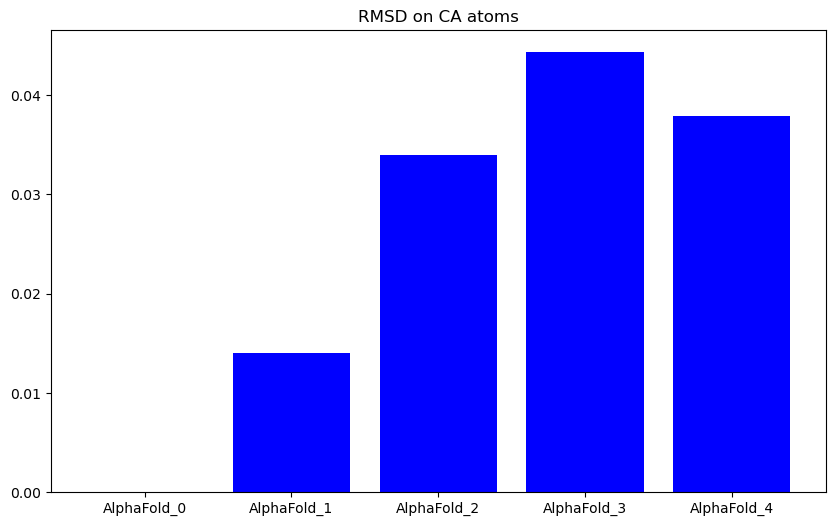

In [17]:
#First, we will plot the RMSD for the alpha carbon atoms

mplt.figure(figsize=(10, 6))
data = [0,0.01404038, 0.03395914, 0.04430555, 0.03784496]
labels = ['AlphaFold_0', 'AlphaFold_1', 'AlphaFold_2', 'AlphaFold_3', 'AlphaFold_4']
mplt.bar(labels, data, color='blue')
mplt.title('RMSD on CA atoms')

Text(0.5, 1.0, 'RMSD on Backbone')

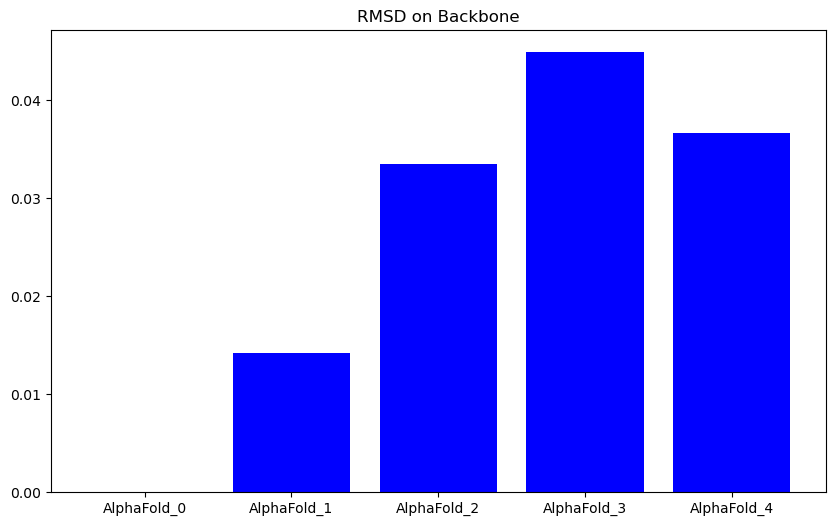

In [16]:
#Next, we will plot RMSD for the backbone

mplt.figure(figsize=(10, 6))
data = [0, 0.01417474, 0.0335379, 0.04493427, 0.03666973]
labels = ['AlphaFold_0', 'AlphaFold_1', 'AlphaFold_2', 'AlphaFold_3', 'AlphaFold_4']
mplt.bar(labels, data, color='blue')
mplt.title('RMSD on Backbone')

Text(0.5, 1.0, 'RMSD on Sidechains')

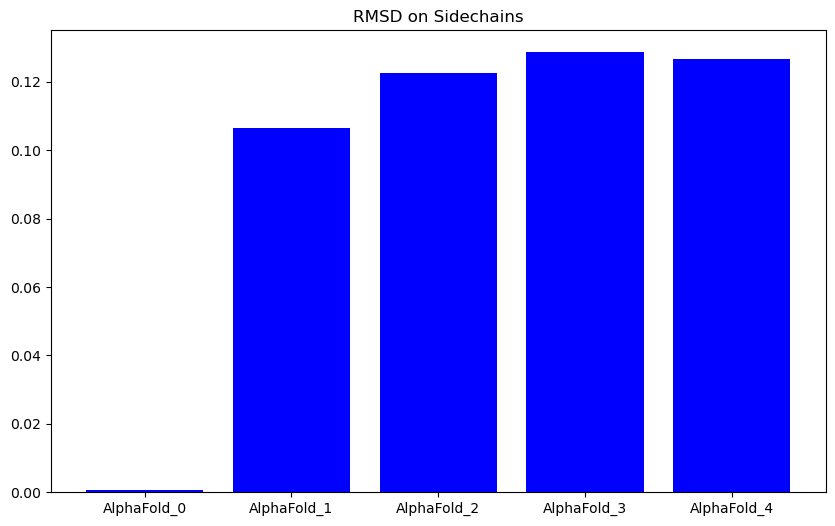

In [18]:
#Last, we will plot RMSD for the sidechains 

mplt.figure(figsize=(10, 6))
data = [0.00054498, 0.10653157, 0.12244698, 0.12865327, 0.12659134]
labels = ['AlphaFold_0', 'AlphaFold_1', 'AlphaFold_2', 'AlphaFold_3', 'AlphaFold_4']
mplt.bar(labels, data, color='blue')
mplt.title('RMSD on Sidechains')